# Laptop Price Prediction

homework: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/02-regression/homework.md

In [ ]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
# !wget $data 

--2024-10-09 03:17:43--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.004s  

2024-10-09 03:17:43 (69.8 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [29]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [77]:
df_selected = df[['ram', 'storage', 'screen', 'final_price']]
print(df_selected.head())


   ram  storage  screen  final_price
0    8      512    15.6      1009.00
1    8      256    15.6       299.00
2    8      256    15.6       789.00
3   16     1000    15.6      1199.00
4   16      512    15.6       669.01


### EDA
Look at the final_price variable. Does it have a long tail?

<Axes: xlabel='final_price', ylabel='Count'>

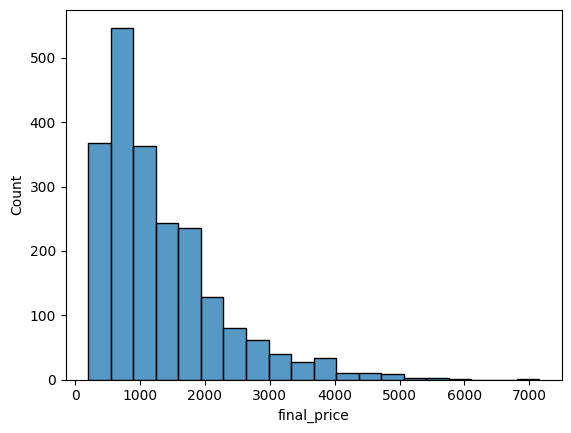

In [78]:
sns.histplot(df_selected['final_price'], bins=20) 

Question 1
There's one column with missing values. What is it?
Answer : Screen

In [79]:
df_selected.isnull().sum() 

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'ram'? 16

In [80]:
df_selected['ram'].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

### Prepare and split 
* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use the same code as in the lectures

In [81]:
n = len(df_selected)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test    

n_train, n_val, n_test

(1296, 432, 432)

In [82]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)   #to shuffle the index

In [83]:
df_train = df_selected.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_selected.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_selected.iloc[idx[n_train+n_val:]].reset_index(drop=True)

df_train

,ram,storage,screen,final_price
0,32,1000,16.0,2417.00
1,16,512,15.4,1410.65
2,8,512,15.3,1829.00
3,8,128,14.0,449.00
4,16,1000,17.3,1073.34
...,...,...,...,...
1291,16,512,13.3,1199.00
1292,8,512,15.6,509.00
1293,8,256,15.6,545.00
1294,8,128,13.0,604.00


In [84]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

### Question 3

In [85]:
#Select values for y and delete them from the dataframes

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [86]:
# Fill missing values with zeros

X_train = df_train.fillna(0).values
X_train


array([[  32. , 1000. ,   16. ],
       [  16. ,  512. ,   15.4],
       [   8. ,  512. ,   15.3],
       ...,
       [   8. ,  256. ,   15.6],
       [   8. ,  128. ,   13. ],
       [  32. , 1000. ,   16. ]])

In [87]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [88]:
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

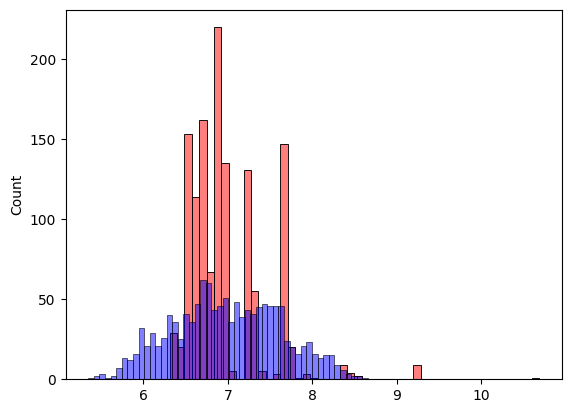

In [89]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [90]:
# RMSE for the training set with missing values filled with zeros
score = rmse(y_train, y_pred)
score

np.float64(0.43)

Validate the model filled with zeros

In [91]:
#Training part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.45)